In [227]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [228]:
df=pd.read_csv("../Dataset/Viral_Social_Media_Trends.csv")
df.head(3)

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium


<Axes: ylabel='Hashtag'>

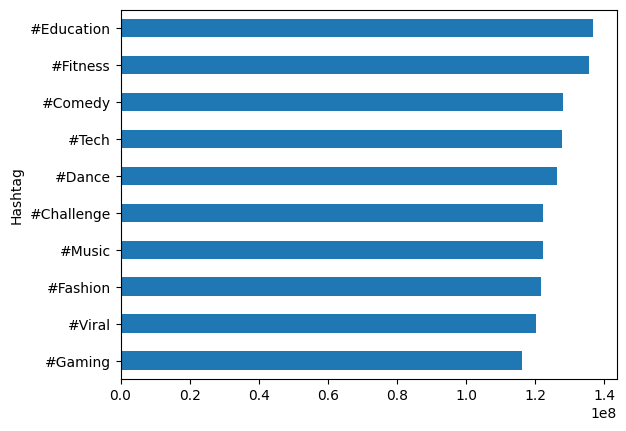

In [229]:
df.groupby(by="Hashtag")["Likes"].sum().sort_values().plot(kind="barh")

<Axes: xlabel='Engagement_Level'>

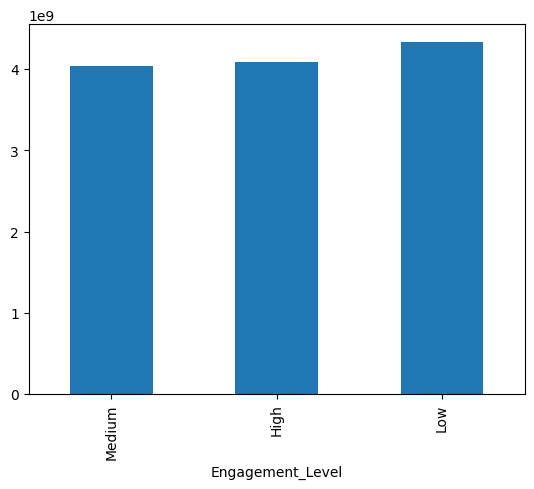

In [230]:
df.groupby(by="Engagement_Level")["Views"].sum().sort_values().plot(kind="bar")

In [231]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Engagement_Level"]=encoder.fit_transform(df["Engagement_Level"])

In [232]:
df["Engagement_Level"]

0       0
1       2
2       2
3       1
4       2
       ..
4995    0
4996    2
4997    1
4998    1
4999    1
Name: Engagement_Level, Length: 5000, dtype: int32

In [233]:
new_df=df[df["Engagement_Level"] == 0]

In [234]:
new_df["Engagement_Level"].value_counts()

Engagement_Level
0    1673
Name: count, dtype: int64

<Axes: ylabel='Hashtag,Engagement_Level'>

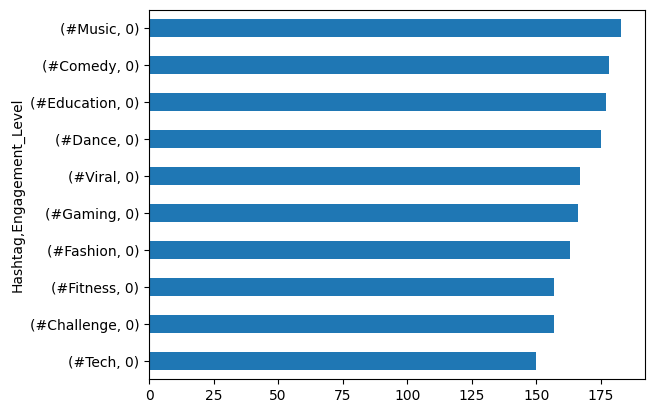

In [235]:
new_df.groupby(by=["Hashtag"])["Engagement_Level"].value_counts().sort_values().plot(kind="barh")

In [236]:
new_df.groupby(by=["Region"])["Views"].sum()

Region
Australia    470796798
Brazil       548554444
Canada       467263838
Germany      471413647
India        500319708
Japan        481365833
UK           546399829
USA          607835015
Name: Views, dtype: int64

<Axes: xlabel='Region'>

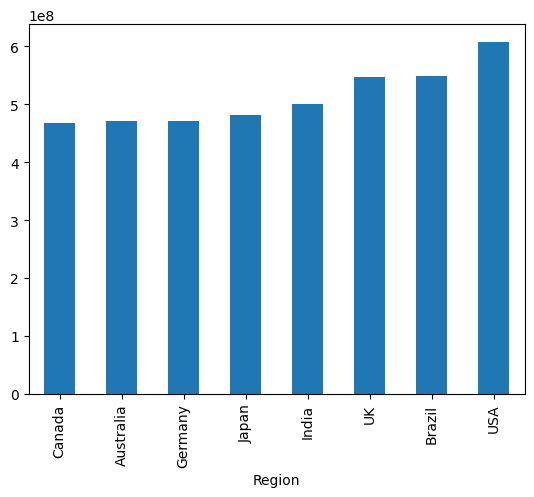

In [237]:
new_df.groupby(by=["Region"])["Views"].sum().sort_values().plot(kind="bar")

In [238]:
new_df.groupby(by=["Region"])["Engagement_Level"].value_counts()

Region     Engagement_Level
Australia  0                   197
Brazil     0                   215
Canada     0                   202
Germany    0                   198
India      0                   209
Japan      0                   201
UK         0                   215
USA        0                   236
Name: count, dtype: int64

<Axes: xlabel='Region,Engagement_Level'>

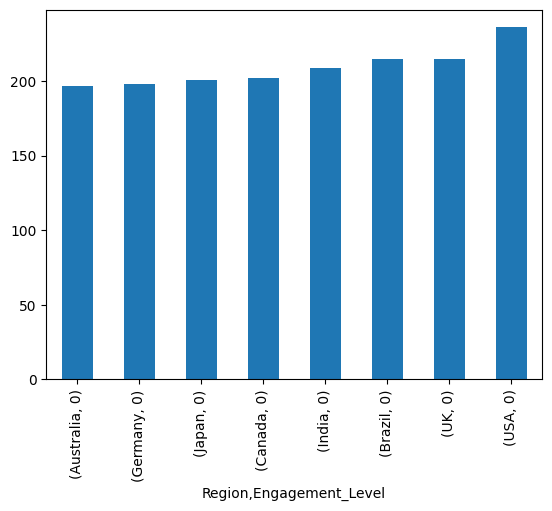

In [239]:
new_df.groupby(by=["Region"])["Engagement_Level"].value_counts().sort_values().plot(kind="bar")

In [240]:
df.drop(columns=["Post_ID"],inplace=True)

In [241]:
df.head(3)

,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,0
1,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,2
2,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,2


In [242]:
dummy_df=pd.get_dummies(df[["Platform","Hashtag","Content_Type","Region"]])
dummy_df = dummy_df.astype(int)

In [243]:
dummy_df.head(3)

,Platform_Instagram,Platform_TikTok,Platform_Twitter,Platform_YouTube,Hashtag_#Challenge,Hashtag_#Comedy,Hashtag_#Dance,Hashtag_#Education,Hashtag_#Fashion,Hashtag_#Fitness,...,Content_Type_Tweet,Content_Type_Video,Region_Australia,Region_Brazil,Region_Canada,Region_Germany,Region_India,Region_Japan,Region_UK,Region_USA
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [244]:
concat_df=pd.concat([df,dummy_df],axis=1)

In [245]:
concat_df.head(3)

,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level,Platform_Instagram,...,Content_Type_Tweet,Content_Type_Video,Region_Australia,Region_Brazil,Region_Canada,Region_Germany,Region_India,Region_Japan,Region_UK,Region_USA
0,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,0,0,...,0,1,0,0,0,0,0,0,1,0
1,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,2,1,...,0,0,0,0,0,0,1,0,0,0
2,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,2,0,...,0,1,0,1,0,0,0,0,0,0


In [246]:
concat_df.drop(columns=["Platform","Hashtag","Content_Type","Region"],inplace=True)

In [247]:
concat_df.head(3)

,Views,Likes,Shares,Comments,Engagement_Level,Platform_Instagram,Platform_TikTok,Platform_Twitter,Platform_YouTube,Hashtag_#Challenge,...,Content_Type_Tweet,Content_Type_Video,Region_Australia,Region_Brazil,Region_Canada,Region_Germany,Region_India,Region_Japan,Region_UK,Region_USA
0,4163464,339431,53135,19346,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,4155940,215240,65860,27239,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3666211,327143,39423,36223,2,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

concat_df["Views"]=scaler.fit_transform(concat_df[["Views"]])
concat_df["Likes"]=scaler.fit_transform(concat_df[["Likes"]])
concat_df["Shares"]=scaler.fit_transform(concat_df[["Shares"]])
concat_df["Comments"]=scaler.fit_transform(concat_df[["Comments"]])

In [249]:
concat_df.head(3)

,Views,Likes,Shares,Comments,Engagement_Level,Platform_Instagram,Platform_TikTok,Platform_Twitter,Platform_YouTube,Hashtag_#Challenge,...,Content_Type_Tweet,Content_Type_Video,Region_Australia,Region_Brazil,Region_Canada,Region_Germany,Region_India,Region_Japan,Region_UK,Region_USA
0,0.832745,0.678653,0.531223,0.386753,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,0.831240,0.429988,0.658567,0.544692,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.733258,0.654049,0.394002,0.724462,2,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0,0


In [250]:
X=concat_df.drop(columns="Engagement_Level").to_numpy()
Y=concat_df["Engagement_Level"].to_numpy()

In [251]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2)

In [252]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()

rc.fit(x_train,y_train)

RandomForestClassifier()

In [253]:
reg_predict=rc.predict(x_test)

In [254]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,reg_predict)

0.35

In [273]:
from sklearn.svm import SVC
sv=SVC(kernel="rbf")
sv.fit(x_train,y_train)
sv_predict=sv.predict(x_test)

In [274]:
accuracy_score(sv_predict,y_test)

0.333

In [277]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn_predict=knn.predict(x_test)

In [278]:
accuracy_score(knn_predict,y_test)

0.32

In [255]:
import tensorflow as tf

model=tf.keras.Sequential()

In [256]:
x_train.shape[1]

32

In [257]:
model.add(tf.keras.layers.Dense(128, input_shape=[x_train.shape[1]],activation='relu'))
model.add(tf.keras.layers.Dropout(.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [258]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,377 (146.00 KB)

 Trainable params: 37,377 (146.00 KB)

 Non-trainable params: 0 (0.00 B)

In [259]:
model.compile(optimizer=tf.keras.optimizers.Adam(1.0),loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=["accuracy"],)

In [260]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='accuracy',  # Monitor validation loss
    patience=20,  # Stop after 5 epochs of no improvement
    restore_best_weights=True  # Restore the best model weights
)

In [261]:
history=model.fit(x_train,y_train,epochs=150,callbacks=[early_stopping])

Epoch 1/150


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3476 - loss: 12184.4883
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3610 - loss: 5600.4482
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3464 - loss: 0.1512
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3553 - loss: 0.1017
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3571 - loss: 0.1431
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3315 - loss: 0.0935
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3577 - loss: 0.1082
Epoch 8/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3479 - loss: 0.1479
Epoch 9/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3430 - loss: 0.2037
Epoch 10/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3501 - loss: 0.1218
Epoch 11/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3365 - loss: 0.1017
Epoch 12/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [264]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

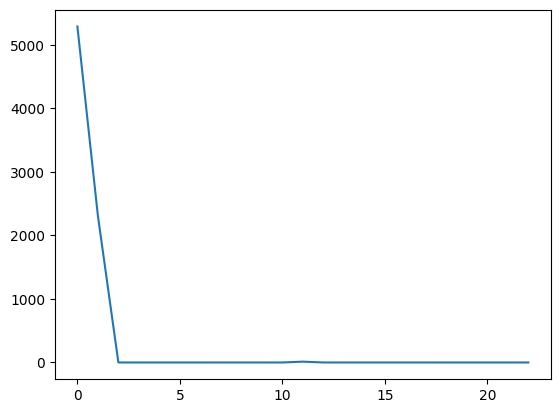

In [265]:
plt.plot(history.history["loss"])

In [269]:
history.history["loss"]

[5286.75439453125,
 2308.971435546875,
 0.12626439332962036,
 0.13064955174922943,
 0.12636405229568481,
 0.1372806429862976,
 0.13164909183979034,
 0.1710161566734314,
 0.11977764964103699,
 0.19172769784927368,
 0.12799187004566193,
 13.045599937438965,
 0.19266489148139954,
 0.12405771017074585,
 0.1800989806652069,
 0.14795087277889252,
 0.16554896533489227,
 0.12491358071565628,
 0.12105874717235565,
 0.14414317905902863,
 0.1219669058918953,
 0.13873185217380524,
 0.1689419448375702]

In [270]:
ann_predict=model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [271]:
ann_predict

array([[0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
       [0.9997602],
